In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def customGraphSettings():
    colors = sns.color_palette("husl", 5)
    plot_settings = {
        'figure.figsize': (10, 7),
        'lines.linestyle': '--',
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.grid': True,
        'font.family': 'serif',
        'font.size': 12}
    plt.rcParams.update(plot_settings)
    plt.style.use('seaborn-v0_8-darkgrid')
    return colors

customGraphSettings()

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

In [16]:
frac_profit = np.empty((3000, 15, 4))
frac_prices = np.empty((3000, 15, 4))
frac_sales = np.empty((3000, 15, 4))
std_profit = np.empty((3000, 15, 4))
std_price = np.empty((3000, 15, 4))
spread_profits = np.empty((3000, 15, 4))
spread_prices = np.empty((3000, 15, 4))

for j, idx in enumerate([23, 15, 7, 1]):
    roundFiles = glob.glob(f'round_single_{idx}_*')
    logFiles = glob.glob(f'log_single_{idx}_*')
    print(len(roundFiles))
    for i in range(len(roundFiles)):
        df = pd.read_csv(logFiles[i])
        df2 = pd.read_csv(roundFiles[i])
        buyerFrac = df.groupby('rnd').sum().bprofit / df2.buyerSurplus 
        priceFrac = df.groupby('rnd').mean().price / df2.peq 
        saleFrac = df.groupby('rnd').sum().sale / df2.qeq 
        frac_profit[:, i, j] = buyerFrac.rolling(window=100).mean().values
        frac_prices[:, i, j] = priceFrac.rolling(window=100).mean().values
        frac_sales[:, i, j] = saleFrac.rolling(window=100).mean().values
        std_profit[:, i, j] = df.groupby('rnd').std().bprofit.rolling(window=100).mean().values
        std_price[:, i, j] = df.groupby('rnd').std().price.rolling(window=100).mean().values
        a = df.groupby(['rnd', 'currentBidIdx']).sum().bprofit.groupby(['rnd']).max()
        b = df.groupby(['rnd', 'currentBidIdx']).sum().bprofit.groupby(['rnd']).min()
        d = df.groupby(['rnd']).max().price
        e = df.groupby(['rnd']).min().price
        c = a-b
        f = d-e
        spread_profits[:, i, j] = c.rolling(window=100).mean().values
        spread_prices[:, i, j] = c.rolling(window=100).mean().values

15
15
12
15


/tmp/ipykernel_13484/620410945.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:5: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:6: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:7: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 3], 1), label='A: No Disclosure')


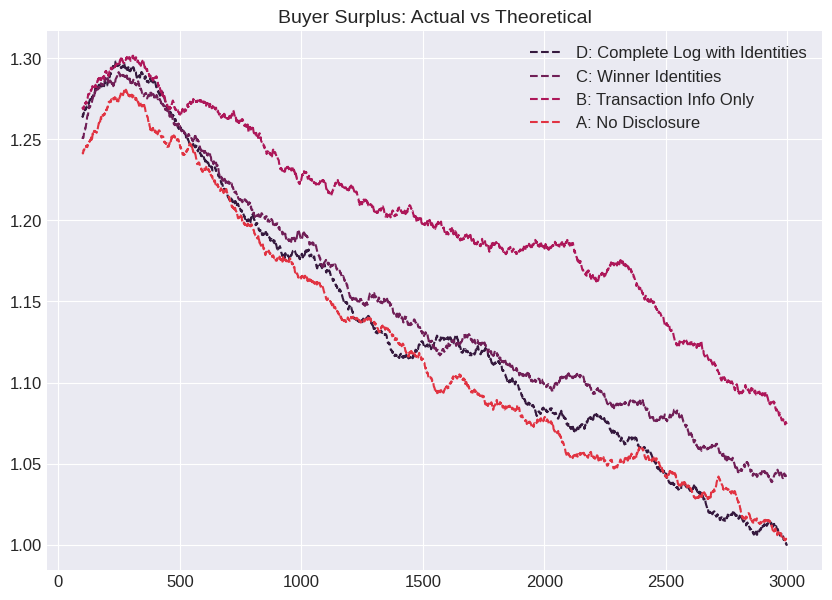

/tmp/ipykernel_13484/620410945.py:13: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:14: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:15: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:16: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 3], 1), label='A: No Disclosure')


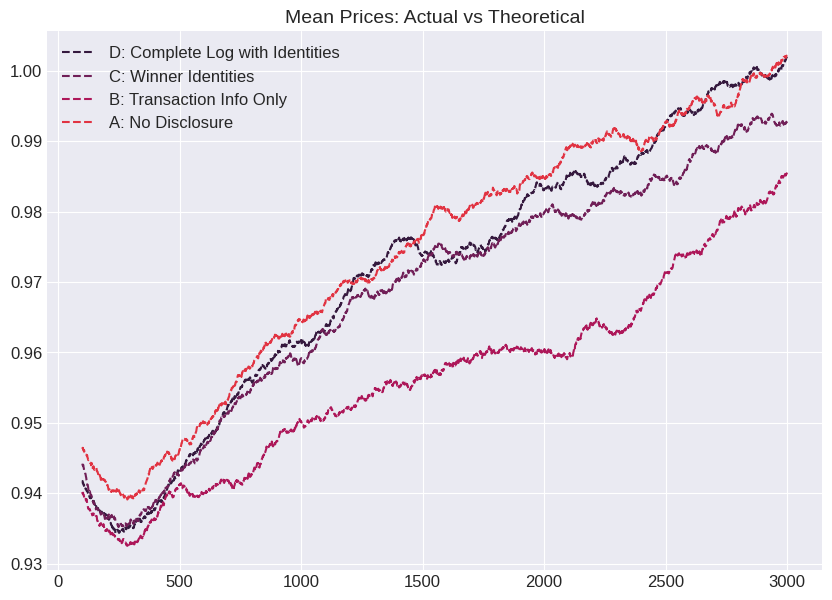

/tmp/ipykernel_13484/620410945.py:22: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:23: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:24: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:25: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 3], 1), label='A: No Disclosure')


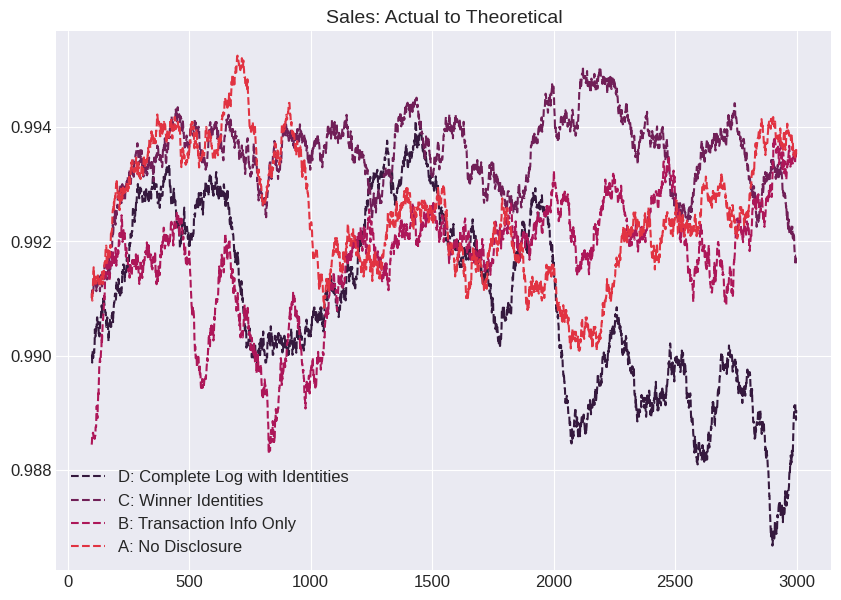

/tmp/ipykernel_13484/620410945.py:31: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:32: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:33: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:34: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 3], 1), label='A: No Disclosure')


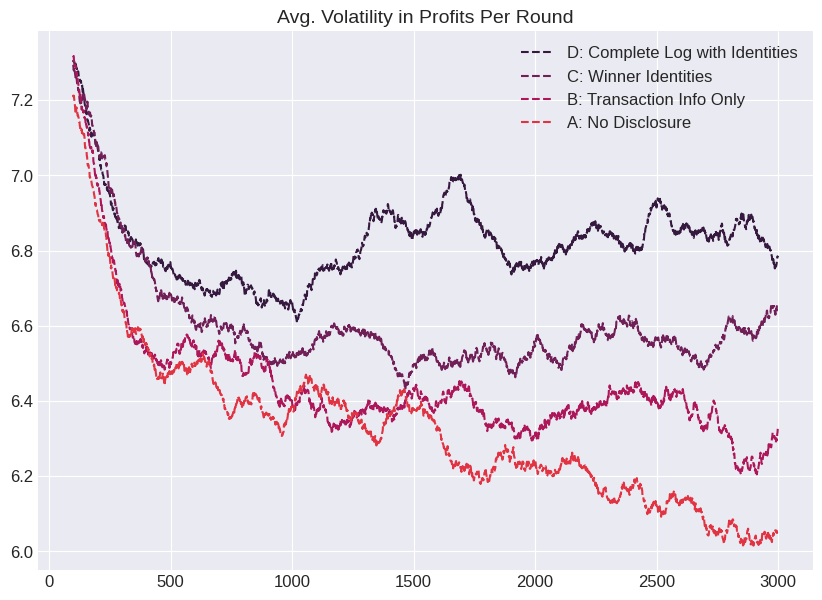

/tmp/ipykernel_13484/620410945.py:40: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:41: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:42: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:43: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 3], 1), label='A: No Disclosure')


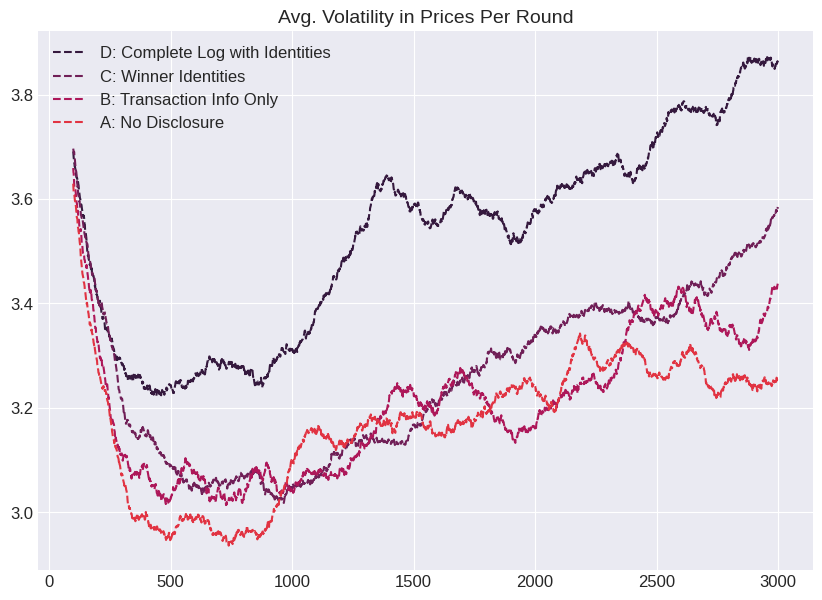

/tmp/ipykernel_13484/620410945.py:49: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_profits[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:50: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_profits[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:51: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_profits[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:52: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_profits[:, :, 3], 1), label='A: No Disclosure')


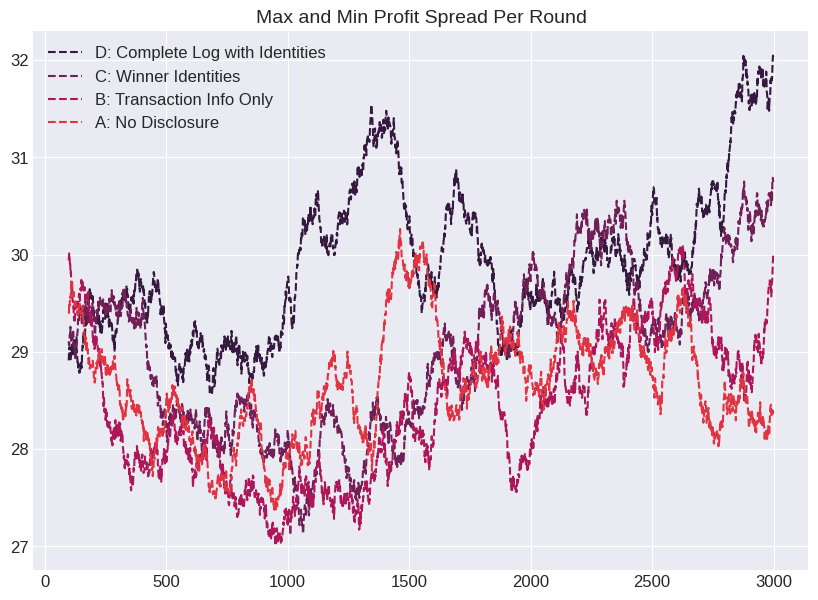

/tmp/ipykernel_13484/620410945.py:58: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_prices[:, :, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_13484/620410945.py:59: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_prices[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_13484/620410945.py:60: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_prices[:, :12, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_13484/620410945.py:61: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(spread_prices[:, :, 3], 1), label='A: No Disclosure')


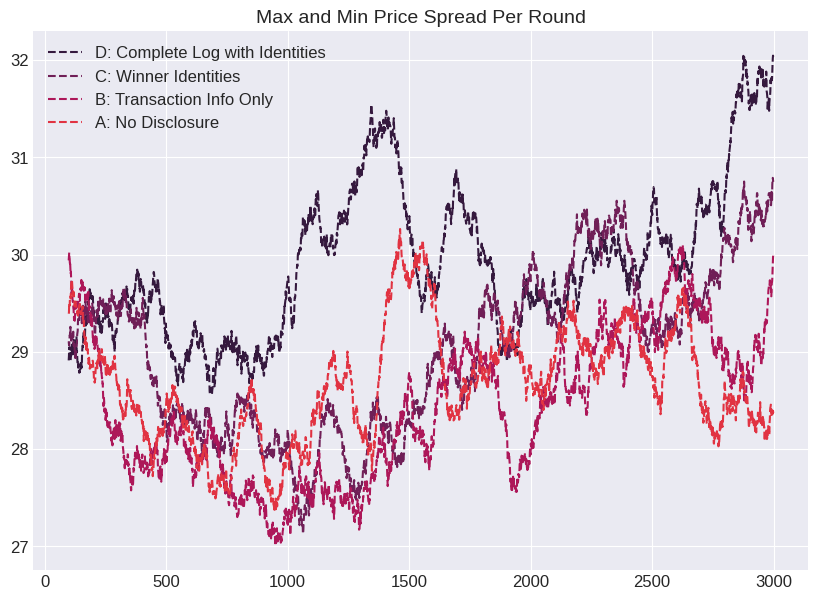

In [21]:
# Buyer Surplus: Actual vs Theoretical
sns.set_palette("rocket")

plt.plot(np.nanmean(frac_profit[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_profit[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_profit[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_profit[:, :, 3], 1), label='A: No Disclosure')
plt.title("Buyer Surplus: Actual vs Theoretical")
plt.legend()
plt.show()

# Mean Prices: Actual vs Theoretical
plt.plot(np.nanmean(frac_prices[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_prices[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_prices[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_prices[:, :, 3], 1), label='A: No Disclosure')
plt.title("Mean Prices: Actual vs Theoretical")
plt.legend()
plt.show()

# Sales: Actual to Theoretical
plt.plot(np.nanmean(frac_sales[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_sales[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_sales[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_sales[:, :, 3], 1), label='A: No Disclosure')
plt.title("Sales: Actual to Theoretical")
plt.legend()
plt.show()

# Avg. Volatility in Profits Per Round
plt.plot(np.nanmean(std_profit[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(std_profit[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(std_profit[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(std_profit[:, :, 3], 1), label='A: No Disclosure')
plt.title("Avg. Volatility in Profits Per Round")
plt.legend()
plt.show()

# Avg. Volatility in Prices Per Round
plt.plot(np.nanmean(std_price[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(std_price[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(std_price[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(std_price[:, :, 3], 1), label='A: No Disclosure')
plt.title("Avg. Volatility in Prices Per Round")
plt.legend()
plt.show()

# Max and Min Profit Spread Per Round
plt.plot(np.nanmean(spread_profits[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(spread_profits[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(spread_profits[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(spread_profits[:, :, 3], 1), label='A: No Disclosure')
plt.title("Max and Min Profit Spread Per Round")
plt.legend()
plt.show()

# Max and Min Price Spread Per Round
plt.plot(np.nanmean(spread_prices[:, :, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(spread_prices[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(spread_prices[:, :12, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(spread_prices[:, :, 3], 1), label='A: No Disclosure')
plt.title("Max and Min Price Spread Per Round")
plt.legend()
plt.show()
